In [1]:
using PyPlot

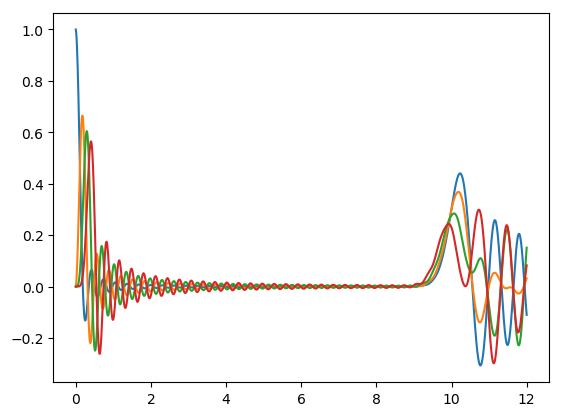

4-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffb58081748>
 PyObject <matplotlib.lines.Line2D object at 0x7ffb58081940>
 PyObject <matplotlib.lines.Line2D object at 0x7ffb58081b38>
 PyObject <matplotlib.lines.Line2D object at 0x7ffb58081d30>

In [28]:
dt = 0.01 # Zeitintervall

k = 1 # Federkonstante
m = 1 # Masse
a = 1 # abstand

N = 50 # Anzahl der gekoppelten Oszillatoren
step_cnt = Int(12*(1/dt)) # Anzahl der Stützstellen pro Massepunkt

ys = zeros(Float64, step_cnt, N) # Auslenkungen zum Zeitpunkt n*dt

ys[1,1] = 1 # Anfangswerte aus Aufgabe

f1(n) = (1/a)*(ys[n-1,2]/a - ys[n-1,1]/a)*((k*a^2)/m) # Beschleunigung, die auf den ersten Massepunkt wirkt
fi(n, i) = (1/a)*((ys[n-1,i+1] - ys[n-1,i])/a - (ys[n-1,i] - ys[n-1, i-1])/a)*((k*a^2)/m) # Beschleunigung, die auf den i-ten Massepunkt wirkt
fN(n) = -(1/a)*(ys[n-1, N]/a - ys[n-1,N-1]/a)*((k*a^2)/m) # Beschleunigung, die auf den letzten (N-ten) Massepunkt wirkt

vs = zeros(Float64, N) # Momentane Geschwindigkeit des Massepunkts n

for n in 2:step_cnt    
    # Zunächst die Momentane Geschwindigkeit jedes Massepunkts anpassen
    vs[1] = vs[1] + dt*f1(n) # Eulerschritt für ersten Massepunkt
    for i in 2:(N-1)
        vs[i] = vs[i] + dt*fi(n, i) # Mittlere Massepunkte
    end
    vs[N] = vs[N] + dt*fN(n) # Letzter Massepunkt
    
    ys[n,:] = ys[n-1,:] + vs[:]
end

plot(linspace(0, 12, step_cnt), ys[:,1:4])
# TODO: labels uns legende

